In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster

In [47]:
df = pd.read_csv('D:/MoneyBall/MoneyballReloaded/NBA_totals_2019-2020.csv')
df[['FG%', '3P%', '2P%', 'FT%', 'eFG%']] = \
df[['FG%', '3P%', '2P%', 'FT%', 'eFG%']].fillna(value=0)
print(df)

                       Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0                Steven Adams   C   26  OKC  63  63  1680  283   478  0.592   
1                 Bam Adebayo  PF   22  MIA  72  72  2417  440   790  0.557   
2           LaMarcus Aldridge   C   34  SAS  53  53  1754  391   793  0.493   
3              Kyle Alexander  PF   23  MIA   2   0    13    1     2  0.500   
4    Nickeil Alexander-Walker  SG   21  NOP  47   1   591   98   266  0.368   
..                        ...  ..  ...  ...  ..  ..   ...  ...   ...    ...   
646                Trae Young  PG   21  ATL  60  60  2120  546  1249  0.437   
647               Cody Zeller   C   27  CHO  58  39  1341  251   479  0.524   
648              Tyler Zeller   C   30  SAS   2   0     4    1     4  0.250   
649                Ante Žižić   C   23  CLE  22   0   221   41    72  0.569   
650               Ivica Zubac   C   22  LAC  72  70  1326  236   385  0.613   

     ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV 

In [48]:
print(df[['PTS','PF','TOV','BLK','STL','AST']])

      PTS   PF  TOV  BLK  STL  AST
0     684  122   94   67   51  146
1    1146  182  204   93   82  368
2    1001  128   74   87   36  129
3       2    1    1    0    0    0
4     267   57   54    8   17   89
..    ...  ...  ...  ...  ...  ...
646  1778  104  289    8   65  560
647   642  140   75   25   40   88
648     2    0    0    0    0    0
649    96   27   10    5    7    6
650   596  168   61   66   16   82

[651 rows x 6 columns]


In [49]:
df['nPTS'] = df['PTS']/df['MP']
df['nPF'] = df['PF']/df['MP']
df['nTOV'] = df['TOV']/df['MP']
df['nBLK'] = df['BLK']/df['MP']
df['nSTL'] = df['STL']/df['MP']
df['nAST'] = df['AST']/df['MP']

In [50]:
reducedDS = df[['Player','nPTS','nPF','nTOV','nBLK','nSTL','nAST','FG%','3P%','2P%','FT%']]
df['FT%'] = df['FT%'].astype('float')



In [51]:
print(reducedDS)

                       Player      nPTS       nPF      nTOV      nBLK  \
0                Steven Adams  0.407143  0.072619  0.055952  0.039881   
1                 Bam Adebayo  0.474141  0.075300  0.084402  0.038477   
2           LaMarcus Aldridge  0.570696  0.072976  0.042189  0.049601   
3              Kyle Alexander  0.153846  0.076923  0.076923  0.000000   
4    Nickeil Alexander-Walker  0.451777  0.096447  0.091371  0.013536   
..                        ...       ...       ...       ...       ...   
646                Trae Young  0.838679  0.049057  0.136321  0.003774   
647               Cody Zeller  0.478747  0.104400  0.055928  0.018643   
648              Tyler Zeller  0.500000  0.000000  0.000000  0.000000   
649                Ante Žižić  0.434389  0.122172  0.045249  0.022624   
650               Ivica Zubac  0.449472  0.126697  0.046003  0.049774   

         nSTL      nAST    FG%    3P%    2P%    FT%  
0    0.030357  0.086905  0.592  0.333  0.594  0.582  
1    0.033926  

In [52]:
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


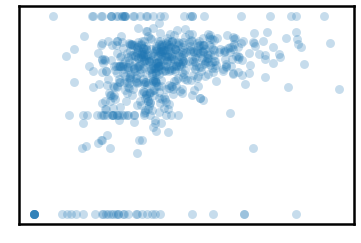

In [53]:
plt.scatter(reducedDS['nPTS'], reducedDS['FT%'], c=None, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [100]:
def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data[data.columns[0]], data[data.columns[1]], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)

In [101]:
test = reducedDS.loc[:, reducedDS.columns != 'Player']


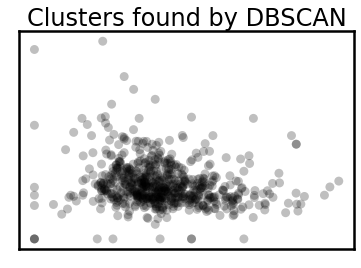

In [103]:
plot_clusters(test, cluster.DBSCAN, (), {'eps':0.001})

In [95]:
test[test.columns[0]]

0      0.407143
1      0.474141
2      0.570696
3      0.153846
4      0.451777
         ...   
646    0.838679
647    0.478747
648    0.500000
649    0.434389
650    0.449472
Name: nPTS, Length: 651, dtype: float64